WORK BY ALEKSANDAR YORDANOV AND TORBEN GUIJARRO HEEB

# Laboratory #2_1 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, exposure, feature, filters, io, transform 
import pandas as pd
import matplotlib.patches as patches
from scipy.spatial import distance

In [ ]:
from google.colab import drive
import requests

drive.mount('/content/drive')

## Template Matching

### Exercise #1: Normalized correlation

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.

In [ ]:
# solution


einstein = io.imread('/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/einstein.png')
template = io.imread('/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/template.png')



In [ ]:
def cross_correlation(image,template):
  result = feature.match_template(einstein, template)

   #index of the biggest value
  ij = np.unravel_index(np.argmax(result), result.shape)
  



  # x is the ->x index and y is the ->y index in the imamge matrix

  y, x = ij[:2]
  print("index of biggest value is: x,y")
  print(x,y)
  print()

  return result,x,y


def plot_cross_correlation(image,template,result,x,y):
  fig = plt.figure(figsize=(8, 3))

  ax1 = plt.subplot(1, 3, 1)
  ax2 = plt.subplot(1, 3, 2)
  ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

  ax1.imshow(template)
  ax1.set_axis_off()
  ax1.set_title('template')

  ax2.imshow(einstein)
  ax2.set_axis_off()
  ax2.set_title('image')

  print("shape of template")
  print(template.shape)
  # highlight matched region
  htemplate, wtemplate = template.shape[:2]
  rect = plt.Rectangle((x, y), wtemplate, htemplate, edgecolor='r', facecolor='none')
  ax2.add_patch(rect)

  result_wb = conver_to_bw(result)

  ax3.imshow(result_wb,cmap="gray")
  ax3.set_axis_off()
  ax3.set_title('`match_template`\nresult')
  #highlight matched region
  ax3.autoscale(False)
  ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

  plt.show()

In [ ]:
def cross_correlation_gray(image,template):
  result = feature.match_template(einstein, template)

   #index of the biggest value
  ij = np.unravel_index(np.argmax(result), result.shape)
  



  # x is the ->x index and y is the ->y index in the imamge matrix

  y, x = ij[:2]
  print("index of biggest value is: x,y")
  print(x,y)
  print()

  return result,x,y


def plot_cross_correlation_gray(image,template,result,x,y):
  fig = plt.figure(figsize=(8, 3))

  ax1 = plt.subplot(1, 3, 1)
  ax2 = plt.subplot(1, 3, 2)
  ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

  ax1.imshow(template,cmap="gray")
  ax1.set_axis_off()
  ax1.set_title('template')

  ax2.imshow(einstein,cmap="gray")
  ax2.set_axis_off()
  ax2.set_title('image')

  print("shape of template")
  print(template.shape)
  # highlight matched region
  htemplate, wtemplate = template.shape[:2]
  rect = plt.Rectangle((x, y), wtemplate, htemplate, edgecolor='r', facecolor='none')
  ax2.add_patch(rect)

  

  ax3.imshow(result,cmap="gray")
  ax3.set_axis_off()
  ax3.set_title('`match_template`\nresult')
  #highlight matched region
  ax3.autoscale(False)
  ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

  plt.show()

index of biggest value is: x,y
51 94

shape of template
(15, 14, 4)


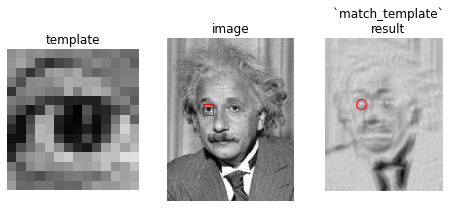

In [ ]:
[result,x,y] = cross_correlation(einstein,template)
plot_cross_correlation(einstein,template,result,x,y)

*   What is the output of the normalized cross-correlation function?

**Solution**

The output of the normalized cross-correlation function is corresponding to the correlation coefficient between the template and the image (einstein). The higher the value the more similar the template and the image are. 

The output of match_template function gives the response image with correlation coefficients. Let us visualize the exact location of the match:
*   Create a function to take the normalized cross-correlation image as input and return a bw image
    *   The function should convert the normalized cross-correlation image to a thresholded image.

In [ ]:
# solution
def conver_to_bw (c_c):
  return c_c[:,:,0]


*   Visualize the thresholded image on top of the original image. Show the exact location of the match in red color.
*   *Hint: learn about alpha channels and listed colormaps in matplotlib*

index of biggest value is: x,y
51 94



(0.0, 1.0)

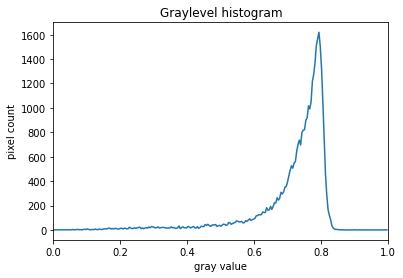

In [ ]:
# solution
[result,x,y] = cross_correlation(einstein,template)

result_bw = conver_to_bw(result)

# show the histogram of the image
histogram, bin_edges = np.histogram(result_bw, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)


Found automatic threshold t = 0.5948102217445097.


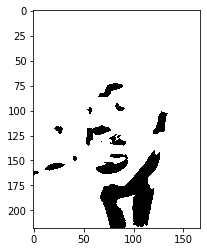

In [ ]:
# perform automatic thresholding
t = filters.threshold_otsu(result_bw)
print("Found automatic threshold t = {}.".format(t))

# create a binary mask with the threshold found by Otsu's method
binary_mask = result_bw > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

We need a higher value for threshold therefore we try with 0.999

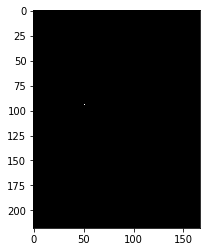

In [ ]:
# try with threshold 0.999
t = 0.999


# create a binary mask with the threshold found by Otsu's method
binary_mask = result_bw > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

We can conclude that because of the cross-correlation algorithm and putting a treshold close to 1 we will only get a white pixel where the algorithm has found the template.

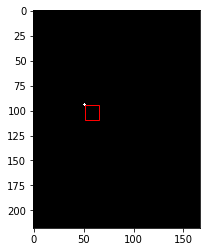

In [ ]:
# try with threshold 0.8
t = 0.86


# create a binary mask with the threshold found by Otsu's method
binary_mask = result_bw > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

htemplate, wtemplate = template.shape[:2]
rect = plt.Rectangle((x, y), wtemplate, htemplate, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [ ]:
def plot_threshold_image(result,t):
  # try with threshold 0.8
  
  result_bw = conver_to_bw(result)

  # create a binary mask with the threshold found by Otsu's method
  binary_mask = result_bw > t

  fig, ax = plt.subplots()
  plt.imshow(binary_mask, cmap="gray")

  htemplate, wtemplate = template.shape[:2]
  rect = plt.Rectangle((x, y), wtemplate, htemplate, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

we see that with the decreasing of the threshold the pixels near the closest correlation are above the threshold which is expected from the cross-correlation algorithm.

### Exercise #2: Effect of contrast

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

index of biggest value is: x,y
52 94

shape of template
(15, 14, 4)


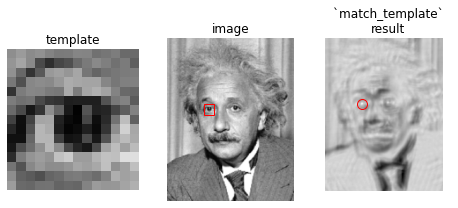

In [ ]:
# solution
einstein = io.imread('/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/einstein_br.png')
template = io.imread('/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/template.png')

[result,x,y] = cross_correlation(einstein,template)
plot_cross_correlation(einstein,template,result,x,y)

*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

index of biggest value is: x,y
52 94

shape of template
(15, 14)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  


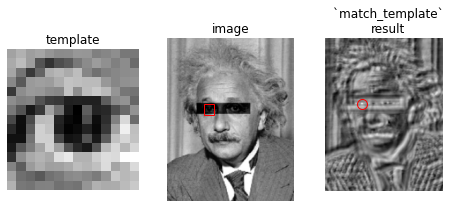

In [ ]:
# solution

# solution
einstein = io.imread('/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/einstein_mask.png')
template = io.imread('/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/template.png')

einstein = color.rgb2gray(einstein)
template = color.rgb2gray(template)


[result,x,y] = cross_correlation_gray(einstein,template)
plot_cross_correlation_gray(einstein,template,result,x,y)

*   Do you find any differences in results with respect to contrast changes? 
*   Explain your inferences.

**Solution**

There are no differences in the results when changing the contrast of the image. This is because the cross-correlation finds the correlation between a template and an image, it does not try to find matching intensities. The cross-correlation function looks at the product of the variations of intensities from the mean for the image and the template (and the product of their standard deviations). 


*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

index of biggest value is: x,y
52 94

shape of template
(15, 14, 4)


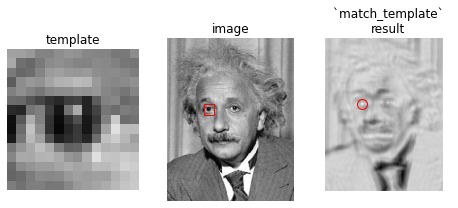

In [ ]:
# solution
einstein = io.imread('/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/einstein.png')
template = io.imread('/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/template_br.png')

[result,x,y] = cross_correlation(einstein,template)
plot_cross_correlation(einstein,template,result,x,y)


**Solution**

Same as previously, no changes.

**Exercise #3: Effect of rotation**

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 15&deg;, 20&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

index of biggest value is: x,y
51 94

shape of template
(15, 14)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.


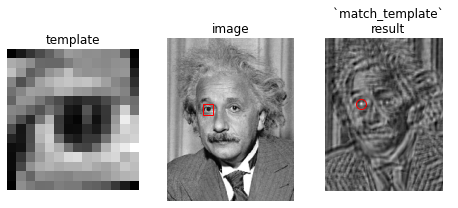

index of biggest value is: x,y
51 94

shape of template
(15, 14)


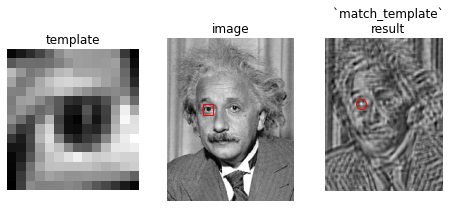

index of biggest value is: x,y
51 94

shape of template
(15, 14)


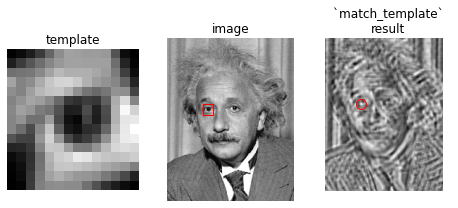

In [ ]:
# solution

einstein = io.imread('/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/einstein.png')
template = io.imread('/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/template.png')

# template = transform.rotate(template,10)
# [result,x,y] = cross_correlation(einstein,template)
# plot_cross_correlation(einstein,template,result,x,y)
# plot_threshold_image(result,0.79)


# template = transform.rotate(template,5)
# [result,x,y] = cross_correlation(einstein,template)
# plot_cross_correlation(einstein,template,result,x,y)
# plot_threshold_image(result,0.79)

# template = transform.rotate(template,5)
# [result,x,y] = cross_correlation(einstein,template)
# plot_cross_correlation(einstein,template,result,x,y)
# plot_threshold_image(result,0.76)




einstein = color.rgb2gray(einstein)
template = color.rgb2gray(template)

template = transform.rotate(template,10)
[result,x,y] = cross_correlation_gray(einstein,template)
plot_cross_correlation_gray(einstein,template,result,x,y)
#plot_threshold_image(result,0.79)


template = transform.rotate(template,5)
[result,x,y] = cross_correlation_gray(einstein,template)
plot_cross_correlation_gray(einstein,template,result,x,y)
#plot_threshold_image(result,0.79)

template = transform.rotate(template,9)
[result,x,y] = cross_correlation_gray(einstein,template)
plot_cross_correlation_gray(einstein,template,result,x,y)
#plot_threshold_image(result,0.76)


*   What do you infer with respect to rotation?

**Solution**

Rotation of the template below 25 can still find the patch but going above or 25 makes it impossible for the algorithm to match the template.

Rotation of the image does difficult cross-correlation, especially if it’s above 20 degrees. 
This is because cross-correlation assumes that there is only translation change between the template and the image. 

Ref: https://medium.com/mlearning-ai/image-template-matching-using-cross-correlation-2f2b8e59f254


## Histogram of Oriented Gaussians

### Exercise #1: HOG Image Visualization

*   Load 'astronaut' image from the data module.
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib


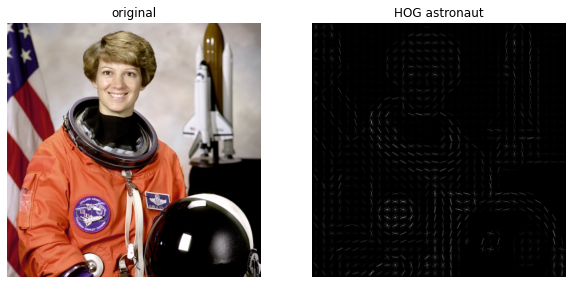

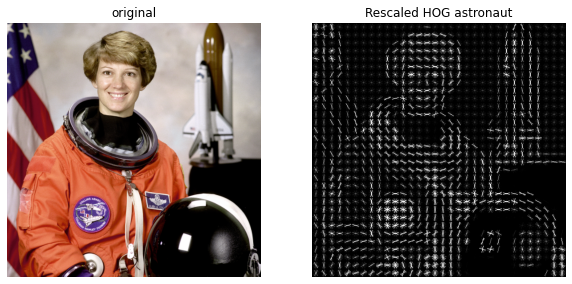

In [ ]:
# solution
astronaut = data.astronaut()
gray_astronaut = color.rgb2gray(astronaut) # optional (if skimage v0.19) to gray because during HOG the image is assumed to be a grayscale (single channel) image
gamma_astronaut = exposure.adjust_gamma(gray_astronaut,gamma=1) # optional gamma correction of the gray image

# HOG                                      
hog_descriptor, hog_astronaut = feature.hog(astronaut, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True) 

# Plotting 1
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(astronaut)
axs[1].imshow(hog_astronaut, cmap=plt.cm.gray)

axs[0].axis('off')
axs[1].axis('off')

axs[0].set_title("original")
axs[1].set_title("HOG astronaut")
plt.show()

# Plotting with rescale
rescaled_hog_astronaut = exposure.rescale_intensity(hog_astronaut, in_range=(0, 10))
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(astronaut)
axs[1].imshow(rescaled_hog_astronaut, cmap=plt.cm.gray)

axs[0].axis('off')
axs[1].axis('off')

axs[0].set_title("original")
axs[1].set_title("Rescaled HOG astronaut")
plt.show()

*   Explain the algorithm behind HOG



**Solution**

**Solution**

The Histogram of Oriented Gradients (HOG) is done by:


1.   (optional) global image normalisation
2.   computing the gradient image in x and y
3.   computing gradient histograms
4.   normalising across blocks
5.   flattening into a feature vector


1.   (optional) global image normalisation

This is an optional step: it can be done to ensure normalized color and gamma values, to reduce the influence of illumination effetcs. However, as Dalal and Triggs have pointed out, it is not necessary as the ensuing descriptor normalization achieves the same result. 
Nevetheless, the skimage function (in v0.19) (skimage.feature.hog) if multichannel or channel_axis is not specified then the image is assumed to be a grayscale (single channel).  

2.   computing the gradient image in x and y

The gradient of the image is calculated by filtering the image through the kernels: [-1,0,1] and [-1,0,1]^T. As well as the magnitude and the direction of the gradients using the formulas:

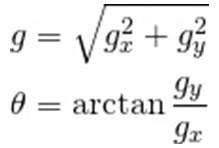

3.   computing gradient histograms

The image window is divided into small regions called "cells". For each cell it buids up a 1-D histogram of gradient or edge orientations over all the pixels in the cell, forming a "orientation histogram". Each orientation histogram divides the gradient angle into a fixed number of predetermined bins. The gradient magnitude (or a function of the magnitude) of the pixels in the cell are used to vote into the orientation histogram.

4.   normalising across blocks

To account for changes in illumiation and contrast, the cells are grouped into larger spacially connected blocks and the gradient strengths are locally normalized. Usually, cells overlap between several blocks, but its normalization are block dependent and thus different. The cells will therefore appear multiple times in the final output vector with different normalisations. The normalised block descriptors are known as Histogrm of Oriented Gradient (HOG) descriptors. 

Block normalization can be done using: L2-norm, L2-hys, L1-norm, L1-sqrt. 

5.   flattening into a feature vector

The dense overlaping grid of blocks covering the detection window is combined into a feature vector for use in the window classifier. 

References:
- https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients
- https://towardsdatascience.com/hog-histogram-of-oriented-gradients-67ecd887675f
- https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html
- https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.hog




*   Is it necessary to do image pre-processing to normalize the color and gamma values before applying HoG?

**Solution**

As mentioned above, this is an optional step: it can be done to ensure normalized color and gamma values, to reduce the influence of illumination effects. However, as Dalal and Triggs have pointed out, it is not necessary as the ensuing descriptor normalization achieves the same result. 

*   What do you infer from the parameters
    *   orientation
    *   pixels_per_cell


**Solution**

Orientation refers to the number of orientation bins. This would be to evenly distribute the orientation bins over 0 to 180 or 0 to 360 degrees (0 to pi or 0 to 2pi).

Pixels_per_cell: number of pixels per cell, to create a 1-D histogram of gradient or edge orientations (step 3). 

*   Change the value of orientation (try atleast 3 different values) and compare the hog_image using matplotlib subplot.

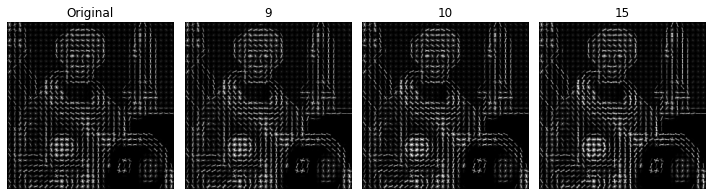

In [ ]:
# solution
orientation = [8,9,10,15]
images = []
for o in orientation:
  hog_descriptor, hog_astronaut = feature.hog(astronaut, orientations = o, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
  rescaled_hog_astronaut = exposure.rescale_intensity(hog_astronaut, in_range=(0, 10))
  images.append(rescaled_hog_astronaut)

fig, ax = plt.subplots(1,4, figsize=(10, 10))

titles = ['Original', '9', '10','15']

for i in range(0, len(images)):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(titles[i])
    ax[i].axis('off')

plt.tight_layout()
plt.show()

*   What is the role of block normalization in HoG?
*   What are the different methods available in block normalization fo skimage?

**Solution**

As mentioned earlier, 

To account for changes in illumiation and contrast, the cells are grouped into larger spacially connected blocks and the gradient strengths are locally normalized. Usually, cells overlap between several blocks, but its normalization are block dependent and thus different. The cells will therefore appear multiple times in the final output vector with different normalisations. The normalised block descriptors are known as Histogrm of Oriented Gradient (HOG) descriptors.

Block normalization can be done using: L2-norm, L2-hys, L1-norm, L1-sqrt.

*   The hog function in skimage returns feature descriptors and hog image. Explain each dimension of the feature descriptor output

**Solution**

The feature descriptor output or HOG descriptor is characterized by: 
- n_blocks_row: number of rows of each block 
- n_blocks_col: number of columns of each block
- n_cells_row:  number of rows of each cell
- n_cells_col:  number of columns of each cell
- n_orient: number of orientation bins


### Exercise #2: Pedestrian detection

*   Read the template ('person_template.png') and obtain its HOG descriptor (try different values for the parameters and get the optimal value)
*   Visualize the original image and the hog_image using matplotlib. 
*   Show different parameter selection steps also using matplotlib.
*   How did you select the optimal value?

In [ ]:
# solution
template = io.imread('/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/person_template.bmp')
#template = io.imread('/content/drive/MyDrive/CV/CV_lab4/P04_11_oct_2022_template_matching_and_HOG/images/person_template.bmp')
gray_template = color.rgb2gray(color.rgba2rgb(template))

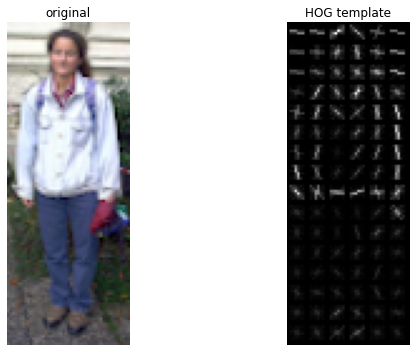

In [ ]:
# 15, 4,4
descriptor_template, hog_template = feature.hog(gray_template, orientations = 10, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
rescaled_hog_template = exposure.rescale_intensity(hog_template, in_range=(0, 10))

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(template)
axs[1].imshow(rescaled_hog_template, cmap=plt.cm.gray)

axs[0].axis('off')
axs[1].axis('off')

axs[0].set_title("original")
axs[1].set_title("HOG template")

plt.tight_layout()
plt.show()

If has been previously reported that 8,8 pixels is well suited for pedestrian detection. 

Ref: https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients



*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Use euclidean distance and dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using both the metrics in a matplotlib subplot*


In [ ]:
# folders = '/content/drive/MyDrive/CV/CV_lab4/P04_11_oct_2022_template_matching_and_HOG/images/pedestrians'
# dirs = os.listdir(folders)

i = 13
name_if_img = 'person_0'
pedestrians = []
for n in range(18):
  path = '/content/drive/MyDrive/Computer Vision/P04_11_oct_2022_template_matching_and_HOG/images/pedestrians/'+name_if_img+str(i)+'.bmp'
  #path = '/content/drive/MyDrive/CV/CV_lab4/P04_11_oct_2022_template_matching_and_HOG/images/pedestrians/'+name_if_img+str(i)+'.bmp'
  if os.path.exists(path):
    ped = io.imread(path)
    pedestrians.append(ped)
  i+=1


In [ ]:
# convert images to grayscale
gray_pedestrians = []
for person in pedestrians:
  gray = color.rgb2gray(person)
  gray_pedestrians.append(gray)


In [ ]:
# getting hog descriptors for each image
descriptors = []
hog_pedestrians = []
for gray_person in gray_pedestrians:
  fd_pd, hog_pd = feature.hog(gray_person, orientations = 10, pixels_per_cell=(5, 5), 
                                                  cells_per_block=(1, 1), visualize=True)
  descriptors.append(fd_pd)
  hog_pedestrians.append(hog_pd)

In [ ]:
## sliding window
def sliding_window(image,window_size, step_size):


# Create a Rectangle patch
  windows_arr = []
# Add the patch to the Axes
  x_max = image.shape[1]
  y_max = image.shape[0]

  x_to = 0
  y_to = 0

  for y in range(0, image.shape[0], step_size[1]):

        for x in range(0, image.shape[1], step_size[0]):
           
            x_from = x
            y_from = y

            x_to = x_from + window_size[0]
            y_to = y_from + window_size[1]

            # if x_to is more than the image size x-> we set the x_from  to the size of x-> minus the window frame and after taht we will break the inner forloop so we go to the next y
            if x_to > x_max:

              x_from = (x_max - window_size[0])

            # if y_to is more than the image size y-> we set the y_from  to the size of y-> minus the window frame and after that when we finish with 
            #this x-> row we will break from the whole loop and return the window frames
            if y_to > y_max:

              y_from = (y_max - window_size[1])
              
              

            

            sector = image[y_from:y_from+ window_size[1],x_from:x_from+window_size[0]]
            # rect = patches.Rectangle((x,y ), window_size[0], window_size[1], linewidth=1, edgecolor='r', facecolor='none')
            windows_arr.append(sector)
            # ax.add_patch(rect)

            
            if x_to > x_max:

              break
            
        if y_to > y_max:

          break

  return windows_arr

In [ ]:
def get_pedestrian_in_image_and_plot(windows,template_descriptor,gray_image):
  arr_dist = []
  arr_dot = []
  for w in windows:
    fd_w, hog_w =  feature.hog(w, orientations = 10, pixels_per_cell=(5, 5), cells_per_block=(1, 1), visualize=True)
    dist = np.linalg.norm(fd_w-descriptor_template)
    dot = np.dot(descriptor_template,fd_w)

    arr_dist.append(dist)
    arr_dot.append(dot)

  dist_minIDX = np.argmin(arr_dist)
  dot_maxIDX = np.argmax(arr_dot)


  fig = plt.figure(figsize=(8, 10))

  ax1 = plt.subplot(1, 3, 1)
  ax2 = plt.subplot(1, 3, 2)
  ax3 = plt.subplot(1, 3, 3)

  ax1.set_axis_off()
  ax1.set_title('Image')

  ax2.set_axis_off()
  ax2.set_title('Euclidean Distance')

  ax3.set_axis_off()
  ax3.set_title('Dot product')

  ax1.imshow(gray_image,cmap="gray")
  ax2.imshow(windows[dist_minIDX],cmap="gray")
  ax3.imshow(windows[dot_maxIDX],cmap="gray")

  plt.show()

In [ ]:
for p in pedestrians:

  window_size = [49,129]

  step_size = [5,5]

  windows = sliding_window(p,window_size,step_size)

  des_t, h_t = feature.hog(template, orientations = 10, pixels_per_cell=(5, 5), cells_per_block=(1, 1), visualize=True)

  get_pedestrian_in_image_and_plot(windows,des_t,p)

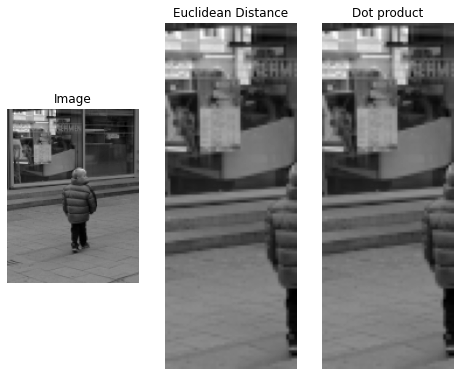

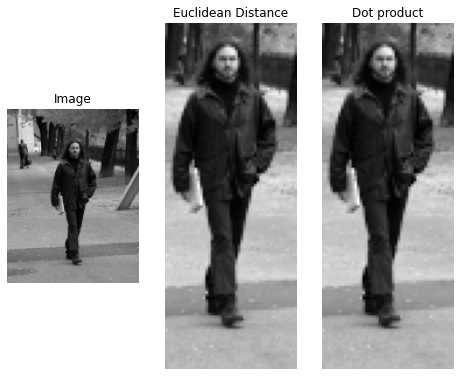

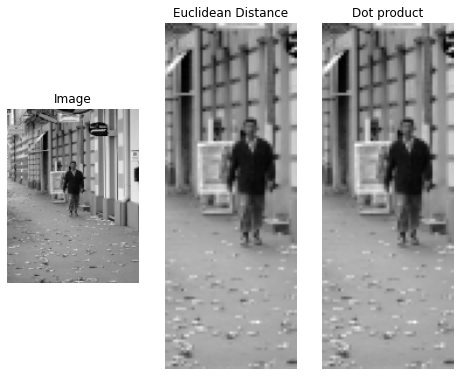

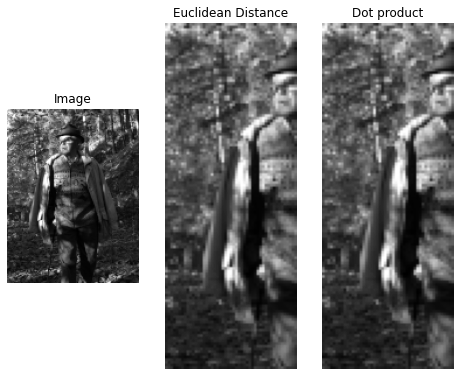

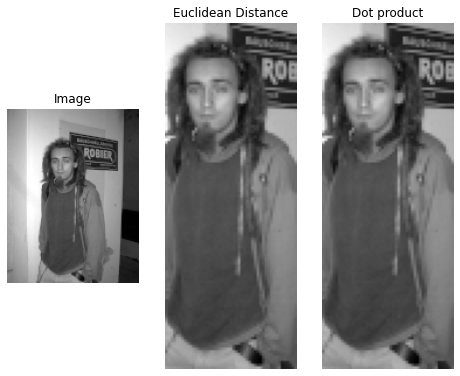

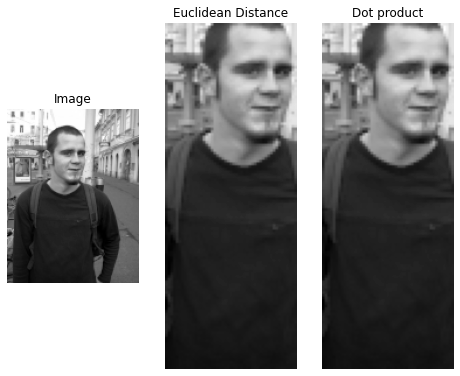

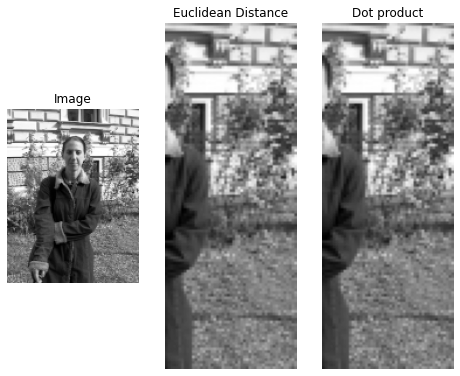

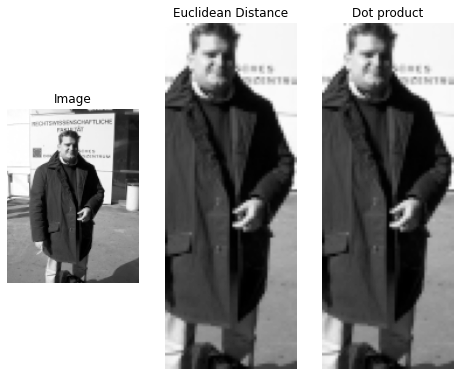

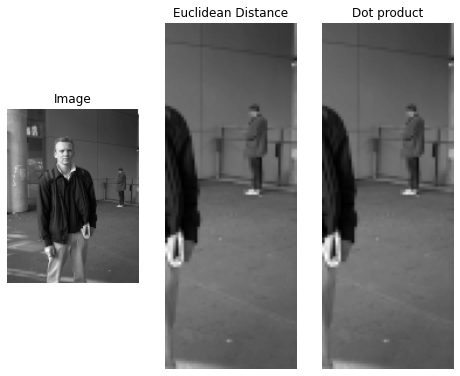

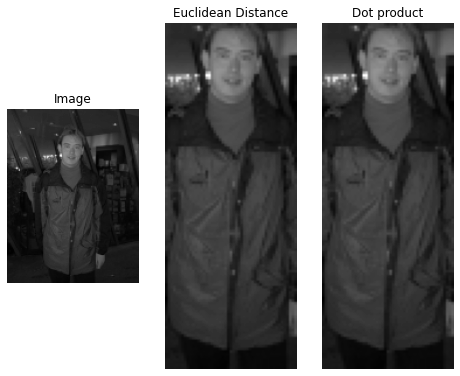

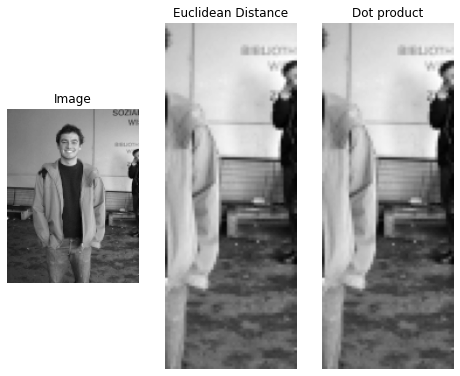

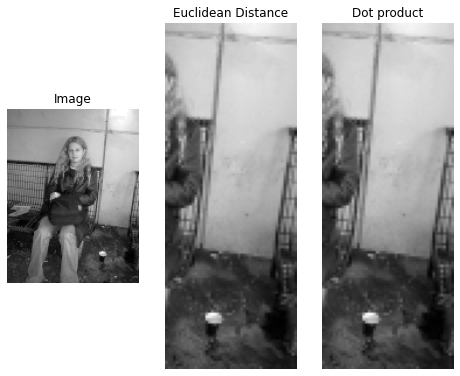

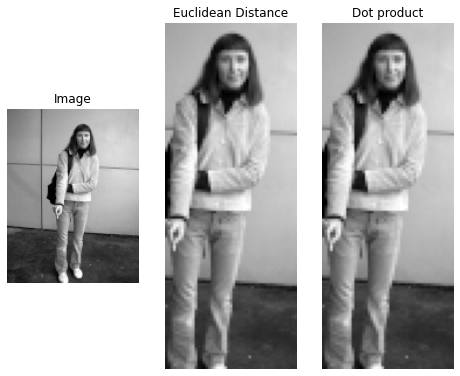

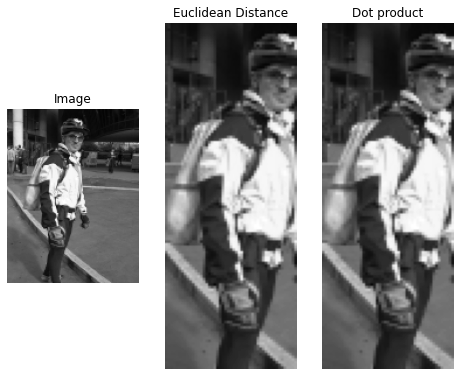

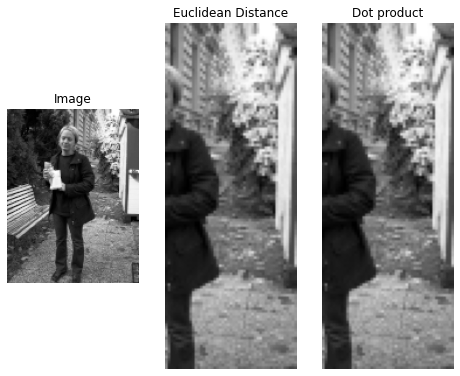

In [ ]:
for p in pedestrians:
  p_gray = color.rgb2gray(p)
  window_size = [49,129]

  step_size = [5,5]

  windows = sliding_window(p_gray,window_size,step_size)

  get_pedestrian_in_image_and_plot(windows,descriptor_template,p_gray)

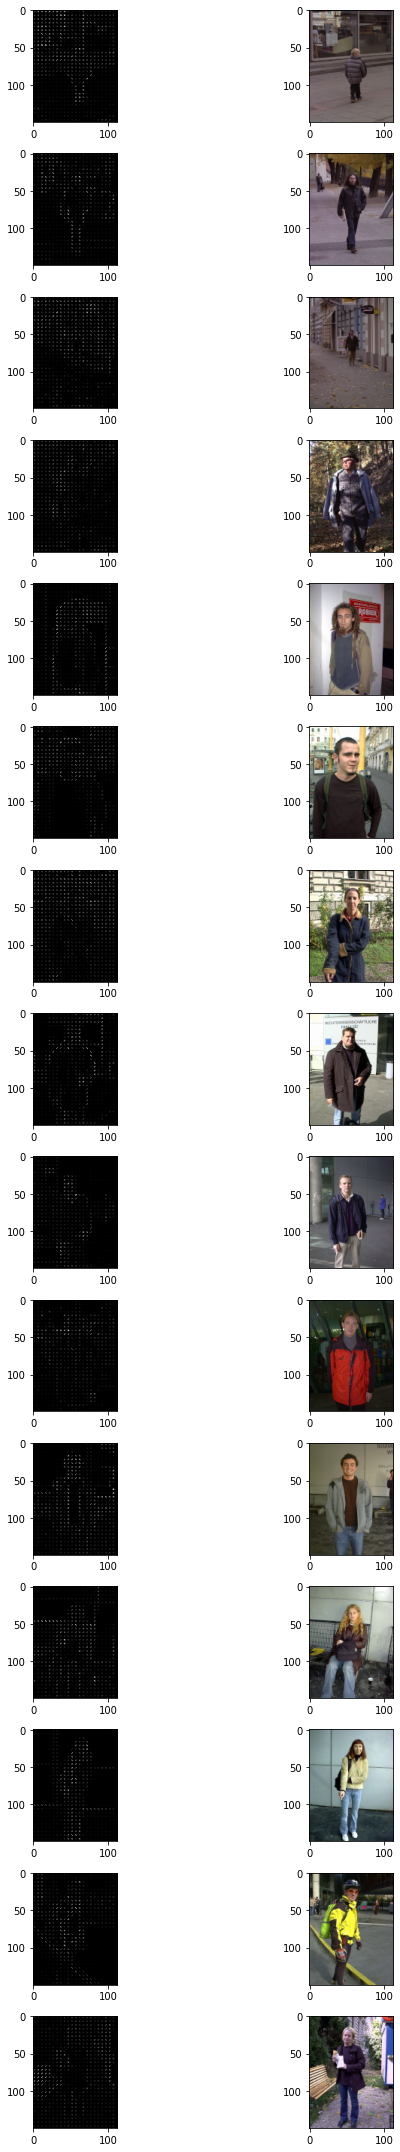

In [ ]:
fig, ax = plt.subplots(15,2, figsize=(10, 30))

for i in range(0, len(hog_pedestrians)):
    ax[i,0].imshow(hog_pedestrians[i], cmap='gray')
    ax[i,1].imshow(pedestrians[i],cmap='gray')

plt.tight_layout()
plt.show()

*   Count the failures and discuss the possible reason for failure for each image.

**Solution**

The failures arise if there are other objects (people or bushes for example) that have a similar silhouette to the template. The other major problem is if the person is not in the same position as the template (up-right vs seated).

*   What is the failure rate for dot product and what is the failure rate for euclidean distance?

**Solution**

The failure rate for both is similar. The difference is that we take the smallest value for the Euclidean distance and the largest value for the dot product. 

*   What is the difference between using dot product and euclidean distance?

**Solution**

Dot product and the euclidean distance are more or less the same, they are proportional to each other. 
However, dot product is affected by the length of the vectors, the larger the feature vector, the more similar they will be. 


*   Compare template matching and HOG. 
*   What are the advantages of HOG over template matching algorithm.

**Solution**

Template matching using cross correlation is effective to match an image and a template. Independently of the size, contrast or intensity of the image. However, it does not perform well on different orientations or scales of the image. Furthermore, you need to know what you are looking for (you need to have a template) in order to locate it on the image. 

On the other hand, unlike template matching, HOG shows invariance to geometric and photometric changes. That is, you can use a template of an object (a person, car) to have “the shape” of the object and locate it in different images. This way, using the template of a person HOG can be used to locate other people (provided that they are more or less in the same position). Nevertheless, if the edges of the object in the image are affected so will detection with HOG. The main limitation of using HOG is that it will be affected by changes in illumination and shadowing (as they will affect the detection of edges). 



---

## **End of L2_1: Template Matching and HOG**
Deadline for L2_1 submission in CampusVirtual is: **Thursday, the 20th of October, 2022**
